# Part 4 Barabasi-Albert Model

Here we're going to create our own Barabasi-Albert model as we did in Lecture 3.

In [69]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

def barabasi_model(nodes):
    # create a graph with one link
    graph = nx.Graph()
    graph.add_nodes_from([0,1])
    graph.add_edge(0 ,1)
    for node in range(2,nodes):
        nodes = np.array(list(graph.edges)).flatten()
        selected = np.random.choice(nodes)
        graph.add_node(node)
        graph.add_edge(node, selected)
    
    return graph

## Create a 100 node BA network  and plot it using NetworkX.

/home/aggelos/.local/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


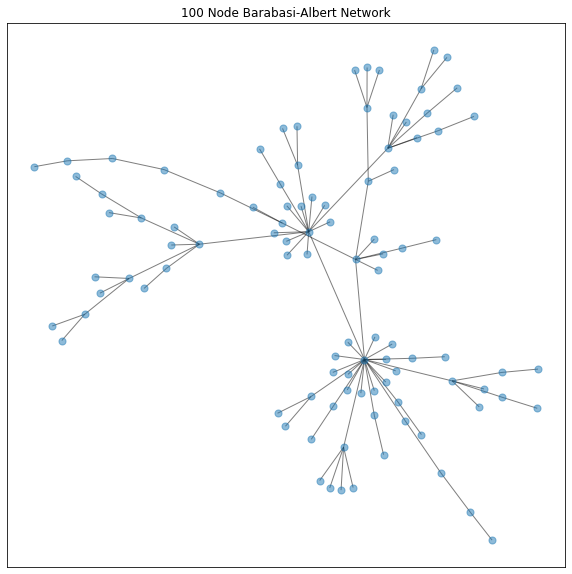

In [70]:
#create a 100 node BA network
BA = barabasi_model(100)
plt.figure(figsize=(10,10))
plt.title("100 Node Barabasi-Albert Network")
nx.draw_networkx(BA, node_size=50, with_labels=False, alpha=0.5)

## 5000 Node BA Network

In [71]:
BA_5000 = barabasi_model(5000)

### Maximum and Minimum Degree

In [72]:
max_degree = max(dict(BA_5000.degree).values())
min_degree = min(dict(BA_5000.degree).values())

print('Max_degree = ', max_degree)
print('Min_degree = ', min_degree)

Max_degree =  84
Min_degree =  1


### Bin the Degree Distribution

In [73]:
hist = [degree for n, degree in BA_5000.degree]
bin_vector = [x for x in range(min(hist), max(hist))]
hist, bin_edges = np.histogram(hist, bins=bin_vector)

### Plot the Distribution

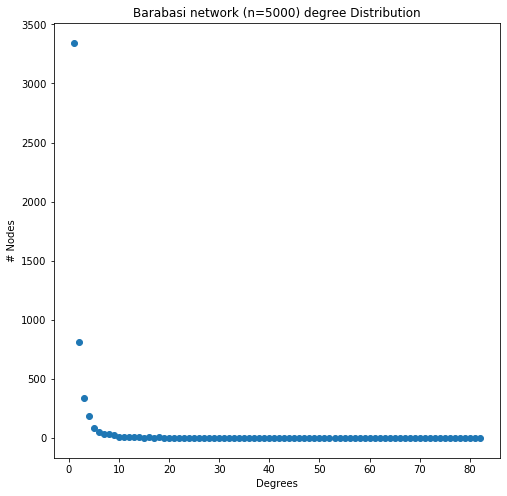

In [74]:
plt.figure(figsize=(8,8))
plt.ylabel('# Nodes')
plt.xlabel('Degrees')
plt.title("Barabasi network (n=5000) degree Distribution")
plt.scatter(bin_edges[:-1], hist)
plt.show()

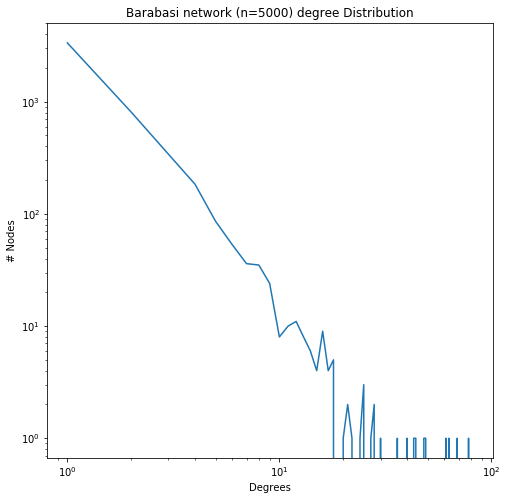

In [75]:
plt.figure(figsize=(8,8))

plt.ylabel('# Nodes')
plt.xlabel('Degrees')
plt.title("Barabasi network (n=5000) degree Distribution")
plt.loglog(bin_edges[:-1], hist)
plt.show()

# Part 5 Power Laws and Friendship Paradox

In [90]:
def friendiship_paradox(graph):
    # initialize a list of boolean True if neigbours degree is larger False if not
    count = []
    for i in range(1000):
        # pick a node n at random and find its degree
        random_node = np.random.choice(list(graph.nodes))
        random_node_degree = graph.degree[random_node]
        #find n's neighbours and their average degree
        neighbors = list(graph[random_node])
        neighbors_avg_degree = np.mean([graph.degree[node] for node in neighbors])
        #check if neiigbours avergae degree is bigger that n's and append it to a list
        count.append(random_node_degree < neighbors_avg_degree)
    return f"Neighbors avg Degree was larger {sum(count)} out of {len(count)} times"

## Check our BA Network for Friendiship Paradox

In [91]:
friendiship_paradox(BA_5000)

'Neighbors avg Degree was larger 853 out of 1000 times'

## Build a network of same size and degree, using the growth mechanism without the preferential attachment

In [78]:
def growth_network(nodes):
    """Construct a graph by adding a node at random with propability 
        inverse to the number of nodes"""
    graph = nx.Graph()
    for node in range(5000):
        if nx.is_empty(graph):
            graph.add_nodes_from([1,2])
            graph.add_edge(1 ,2)
        else:
            graph.add_node(node)
            for n in list(graph.nodes):
                """ make add an edge at random, by attaching the new node 
                    to any other node with a propability p = 1/( number of nodes +1)
                """
                if np.random.rand() < 1/(node+1):
                    graph.add_edge(node, n)
        
    return graph

In [79]:
growt_net = growth_network(5000)

In [80]:
"""We will find the average degree of BA_5000 and construct
    an ER graph with the same p"""

N = 5000
p = sum([d for n, d in BA_5000.degree()])/len(BA_5000.degree()) / (N - 1)

In [81]:
ER = nx.erdos_renyi_graph(n=N, p=p)

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


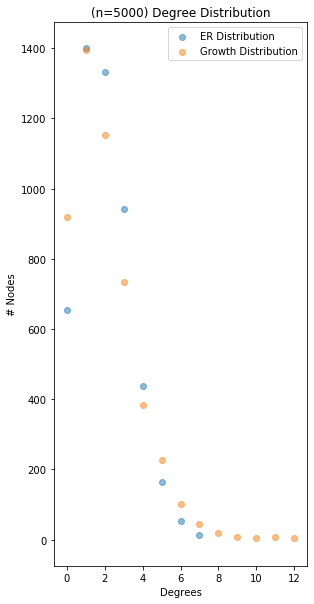

In [82]:
hist = [degree for n, degree in ER.degree]
bin_vector = [x for x in range(min(hist), max(hist))]
hist, bin_edges = np.histogram(hist, bins=bin_vector)
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(121)
ax1.set_ylabel('# Nodes')
ax1.set_xlabel('Degrees')
ax1.scatter(bin_edges[:-1], hist, alpha=0.5)
hist = [degree for n, degree in growt_net.degree]
bin_vector = [x for x in range(min(hist), max(hist))]
hist, bin_edges = np.histogram(hist, bins=bin_vector)
#fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.set_ylabel('# Nodes')
ax1.set_xlabel('Degrees')
ax1.set_title("(n=5000) Degree Distribution")
ax1.scatter(bin_edges[:-1], hist, alpha=0.5)
ax1.legend(labels=['ER Distribution', 'Growth Distribution'], loc=1)
plt.show()

We see that the graph generated by growth mechanism without preferantial attachement has the same properties as the random network.

## Compare BA to the ER network of same size and same  𝑝 . What are the differences? .

### Check the degree distribution

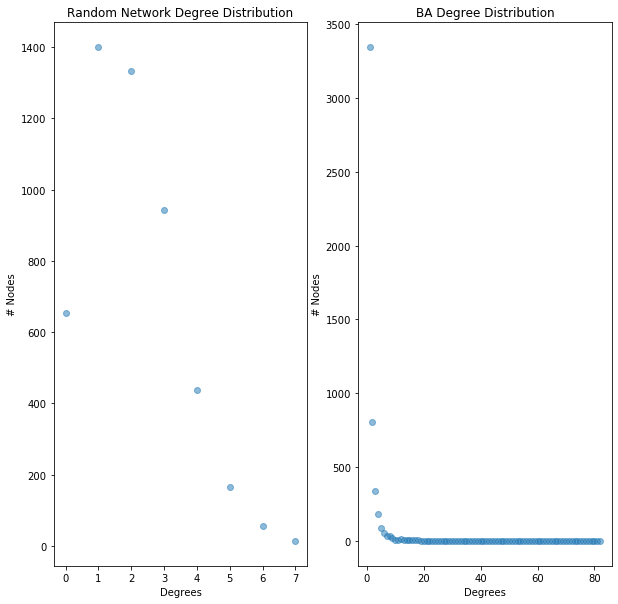

In [83]:
hist = [degree for n, degree in ER.degree]
bin_vector = [x for x in range(min(hist), max(hist))]
hist, bin_edges = np.histogram(hist, bins=bin_vector)
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(121)
ax1.set_ylabel('# Nodes')
ax1.set_xlabel('Degrees')
ax1.set_title('Random Network Degree Distribution')
ax1.scatter(bin_edges[:-1], hist, alpha=0.5)


#fig = plt.figure()
hist = [degree for n, degree in BA_5000.degree]
bin_vector = [x for x in range(min(hist), max(hist))]
hist, bin_edges = np.histogram(hist, bins=bin_vector)
ax2 = fig.add_subplot(122)
ax2.set_ylabel('# Nodes')
ax2.set_xlabel('Degrees')
ax2.set_title("BA Degree Distribution")
ax2.scatter(bin_edges[:-1], hist, alpha=0.5)


plt.show()

###### The maximum and the minimun degree of both graphs

In [84]:
print(f"ER Max Degree: {max(dict(ER.degree).values())} ER Min Degree {min(dict(ER.degree).values())}")
print(f"BA Max Degree: {max(dict(BA_5000.degree).values())} ER Min Degree {min(dict(BA_5000.degree).values())}")


ER Max Degree: 9 ER Min Degree 0
BA Max Degree: 84 ER Min Degree 1


We can see that in the BA network there exist nodes with much larger degree ( >\*10) than in the random network.

### Study the number of connected components

In [85]:
ER_components = list(nx.connected_components(ER))
BA_components = list(nx.connected_components(BA_5000))
print("ER components: ", len(ER_components))
print("BA components: ",len(BA_components))

ER components:  802
BA components:  1


### Also we could check friendship paradox for both networks

In [95]:
print(f"For the BA Network we have {friendiship_paradox(BA_5000)}")
print(f"For the Random Network we have {friendiship_paradox(ER)}")

For the BA Network we have Neighbors avg Degree was larger 857 out of 1000 times


/usr/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


For the Random Network we have Neighbors avg Degree was larger 549 out of 1000 times


We can also observe that the friendship paradox does not occur in random netowrks.